In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
from scipy.stats import skew
from sklearn.utils import resample

pd.set_option('display.max_columns', None)

In [2]:
heart_attack_2020 = pd.read_csv(r'C:\Users\Hp\Documents\Machine_learning_projects\heart_attack_predictions\0_datasets\2020\heart_2020.csv')
heart_attack_2020.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


# Undersampling

Since the the  target class (HeartDiseases) is unbalanced, we proceed to undersample it.

In [3]:
# Finding the numerosity of each class
df_class_0 = heart_attack_2020[heart_attack_2020['HeartDisease'] == 'No']
df_class_1 = heart_attack_2020[heart_attack_2020['HeartDisease'] == 'Yes']

#Undersampling
num_instances_minority_class = len(df_class_1)
df_class_0_undersampled = resample(df_class_0, replace=False, n_samples=num_instances_minority_class, random_state=42)
heart_attack_2020 = pd.concat([df_class_0_undersampled, df_class_1])
heart_attack_2020['HeartDisease'].value_counts()

HeartDisease
No     27373
Yes    27373
Name: count, dtype: int64

# Features distribution

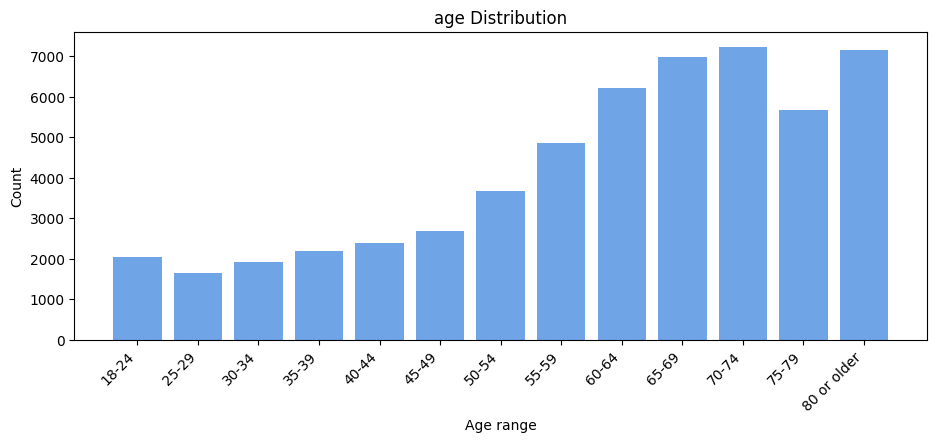

In [4]:
ages = heart_attack_2020['AgeCategory'].value_counts().sort_index()
# Creating the barplot
plt.figure(figsize=(11, 4))
plt.bar(list(ages.index), ages.values, color='#6fa4e6')
plt.xlabel('Age range')
plt.ylabel('Count')
plt.title('age Distribution')
plt.xticks(rotation=45, ha='right')  # Rotating x-axis labels for better readability
plt.show()

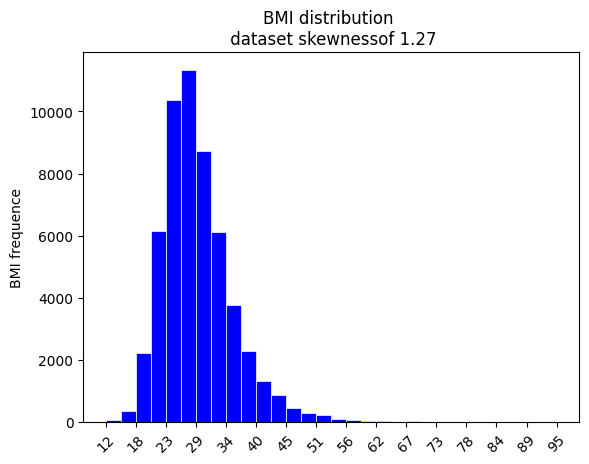

In [5]:
n, bins, patches = plt.hist(heart_attack_2020['BMI'], bins=30, color='b', edgecolor='white', linewidth=0.5)
plt.xticks(bins[::2], labels=np.around(bins[::2]).astype(int), rotation=45) #sulle x metto i valori di inizio e fine di ogni bin, prende in imput la 
#lista di valori da mettere sulle x
plt.ylabel("BMI frequence")
plt.title(f"BMI distribution \n dataset skewnessof {np.around(skew(heart_attack_2020['BMI']), decimals=2)}")
plt.show()

The BMI is positively skewed, for this reason we will test transforming the data with a logarithmic transformation.

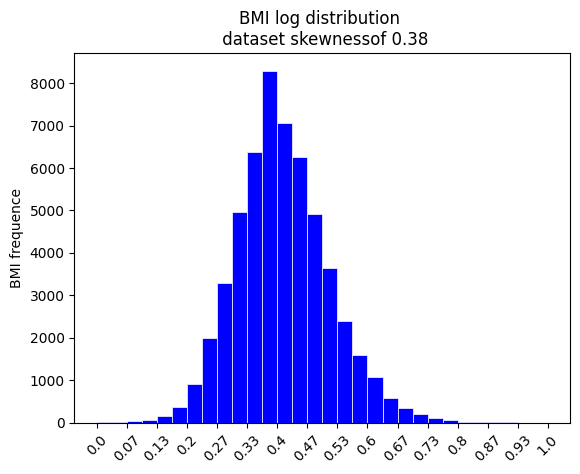

In [6]:
heart_attack_2020['BMI_log'] = np.log(heart_attack_2020['BMI'])
max = heart_attack_2020['BMI_log'].max()
min = heart_attack_2020['BMI_log'].min()
heart_attack_2020['BMI_log'] = (heart_attack_2020['BMI_log'] - min) / (max - min)
n, bins, patches = plt.hist(heart_attack_2020['BMI_log'], bins=30, color='b', edgecolor='white', linewidth=0.5)
plt.xticks(bins[::2], labels=np.round(bins[::2], decimals=2), rotation=45) 
plt.ylabel("BMI frequence")
plt.title(f"BMI log distribution \n dataset skewnessof {np.round(skew(heart_attack_2020['BMI_log']), decimals=2)}")
plt.show()

In [15]:
heart_attack_2020['Sex'].value_counts()

Sex
Male      28858
Female    25888
Name: count, dtype: int64

In [16]:
heart_attack_2020['GenHealth'].value_counts()

GenHealth
Good         17464
Very good    15626
Fair          9583
Excellent     7540
Poor          4533
Name: count, dtype: int64

In [17]:
heart_attack_2020['PhysicalActivity'].value_counts()

PhysicalActivity
Yes    39105
No     15641
Name: count, dtype: int64

In [18]:
heart_attack_2020['Smoking'].value_counts()

Smoking
No     27863
Yes    26883
Name: count, dtype: int64

In [19]:
heart_attack_2020['AlcoholDrinking'].value_counts()

AlcoholDrinking
No     51680
Yes     3066
Name: count, dtype: int64

In [20]:
heart_attack_2020.loc[heart_attack_2020['SleepTime'] > 10, 'SleepTime'] = 11
heart_attack_2020['SleepTime'].value_counts()

SleepTime
8.0     16733
7.0     14920
6.0     11167
5.0      3593
9.0      2998
4.0      1817
10.0     1790
11.0      940
3.0       504
2.0       178
1.0       106
Name: count, dtype: int64

# Visualizing the correlation between categorical variables and heart attack

In [21]:
def plot_categorical_barplot(data_df, x_feature, y, rotation=0):
    '''
    plots the barplot of the percentage of each x feature relative to the value of each y
    '''
    # calculating the number of y labels for each x_feature
    count_df = data_df[[y, x_feature]].groupby([y, x_feature]).size().reset_index(name='Count')
    count_x_label = data_df[[x_feature]].groupby([x_feature]).size().reset_index(name='count_x_label')
    count_df = count_df.merge(count_x_label, on=x_feature)
    #calculating the proportion of y labels for each x_feature
    count_df['Percentage'] = count_df['Count']/count_df['count_x_label']
    plt.figure(figsize=(8, 6))
    sns.barplot(x=x_feature, y='Percentage', hue=y, data=count_df)
    plt.xticks(rotation=rotation)
    plt.xlabel(x_feature)
    plt.ylabel('Percentage')
    plt.show()

In [22]:
def plot_pivot_tab(df, x, HH, rotation=0, distance=0.5):
    pivot_table = pd.crosstab(df[HH], df[x])
    print(pivot_table)
    for column in pivot_table.columns:
        pivot_table[column] = pivot_table[column]/pivot_table[column].sum()
    
    # Catplot for 'No' HeartDisease
    plt.subplot(2, 1, 1)
    plt.grid()
    plt.bar(pivot_table.columns, pivot_table.loc['No'].values, color='g', zorder=10)
    plt.ylabel('Percentage')
    plt.xticks(rotation=rotation)
    plt.xlabel(x)
    plt.title('Percentages of people in the groups of'+ x +' who did not have an heart attack')

    # Catplot for 'Yes' HeartDisease
    plt.subplot(2, 1, 2)
    # add grid in background
    plt.grid()
    plt.bar(pivot_table.columns, pivot_table.loc['Yes'].values, color='r', zorder=10)
    plt.xticks(rotation=rotation)
    plt.xlabel(x)
    plt.title('Percentages of people in the groups of'+ x +' who did had an heart attack')
    plt.ylabel('Percentage')
    
    plt.subplots_adjust(hspace=distance)
    plt.show()


## Age

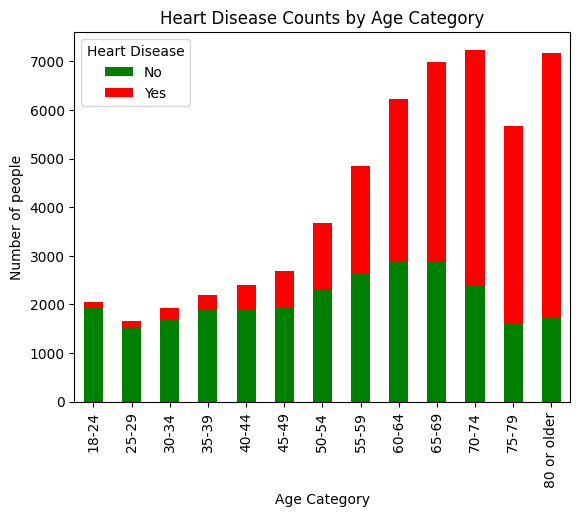

In [23]:
# Creating a DataFrame with the count of occurrences for each combination of 'agecategory' and 'heartdisease'
df_counts = heart_attack_2020.groupby(['AgeCategory', 'HeartDisease']).size().unstack(fill_value=0)

# Plotting the histogram
ax = df_counts.plot(kind='bar', stacked=True, color=['green', 'red'])
# Adding labels and titles
plt.xlabel('Age Category')
plt.ylabel('Number of people')
plt.title('Heart Disease Counts by Age Category')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()

It's less probable to have an heart attack before 44 yo

# BMI

c:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


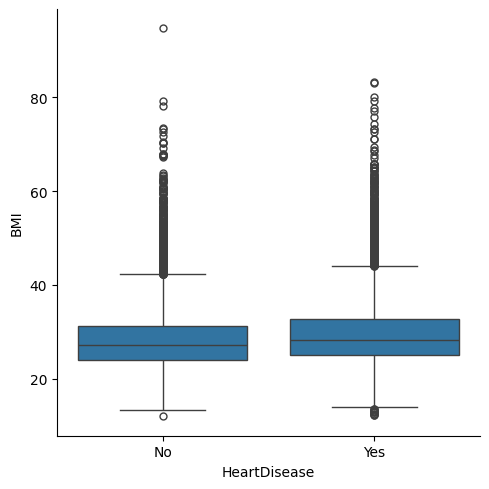

In [24]:
sns.catplot(x='HeartDisease', y="BMI",
            data=heart_attack_2020,
            kind="box",
)


In [25]:
intervalli_bmi = [0,10,20,30,40,50,60,70,80,90,100]

count_df = heart_attack_2020[['BMI', 'HeartDisease']].copy()
count_df['bmi_interval'] = pd.cut(count_df['BMI'], bins=intervalli_bmi, right=False).astype(str)
count_interval = count_df.groupby(['bmi_interval']).size().reset_index(name='total_Count')
count_df = count_df.merge(count_interval, on='bmi_interval')
count_bmi = count_df[['BMI', 'HeartDisease']].groupby(['BMI']).size().reset_index(name='count_x_label')
count_yes_no = count_df.groupby(['bmi_interval','HeartDisease']).size().reset_index(name='count_yes_no')
count_df = count_df.merge(count_yes_no, on=['bmi_interval','HeartDisease'])
count_df['Percentage'] = count_df['count_yes_no']/count_df['total_Count']
count_df = count_df.drop(['BMI'], axis=1).drop_duplicates()
count_df.head()

,HeartDisease,bmi_interval,total_Count,count_yes_no,Percentage
0,No,"[20, 30)",33273,17535,0.527004
17535,Yes,"[20, 30)",33273,15738,0.472996
33273,No,"[30, 40)",16114,7254,0.450168
40527,Yes,"[30, 40)",16114,8860,0.549832
49387,No,"[10, 20)",2214,1251,0.565041


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


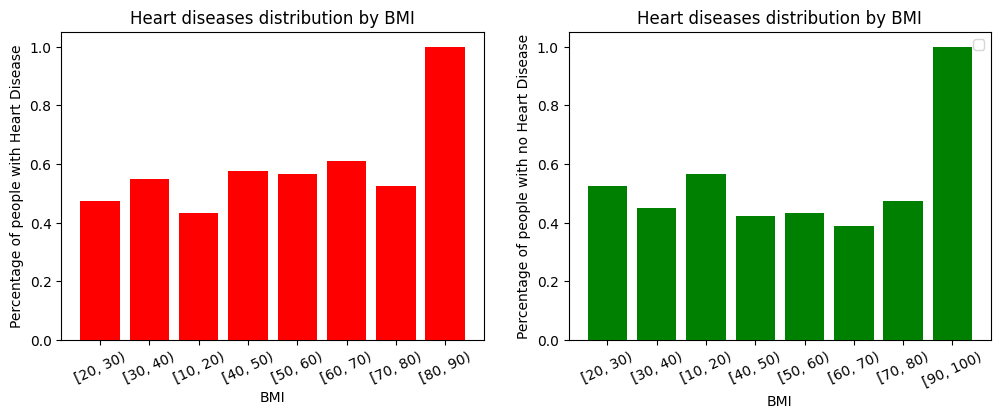

In [26]:

#calculating the proportion of y labels for each x_feature
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.bar(count_df[count_df['HeartDisease']=='Yes']['bmi_interval'], count_df[count_df['HeartDisease']=='Yes']['Percentage'], color='r', zorder=10)
plt.xlabel('BMI')
plt.xticks(rotation=25)
plt.ylabel('Percentage of people with Heart Disease')
plt.title('Heart diseases distribution by BMI')

plt.subplot(1, 2, 2)
plt.bar(count_df[count_df['HeartDisease']=='No']['bmi_interval'], count_df[count_df['HeartDisease']=='No']['Percentage'], color='g', zorder=10)
plt.xlabel('BMI')
plt.xticks(rotation=25)
plt.ylabel('Percentage of people with no Heart Disease')
plt.title('Heart diseases distribution by BMI')
plt.legend()

Having a lower BMI prevents Heart diseases

# Sex

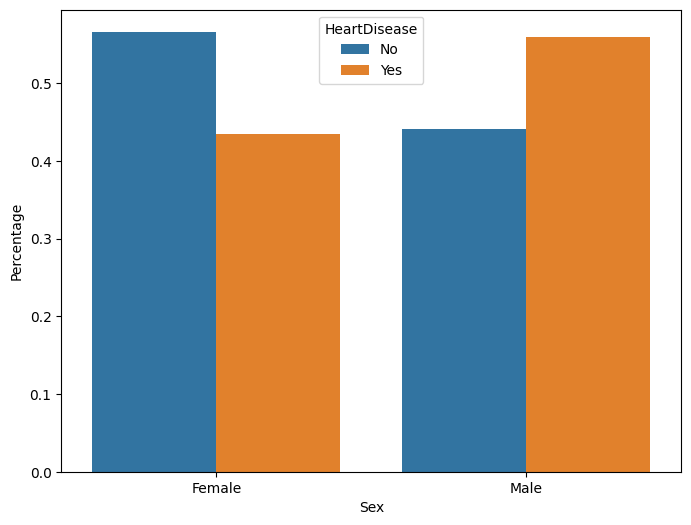

In [27]:
plot_categorical_barplot(heart_attack_2020, 'Sex', 'HeartDisease')

Sex           Female   Male
HeartDisease               
No             14654  12719
Yes            11234  16139


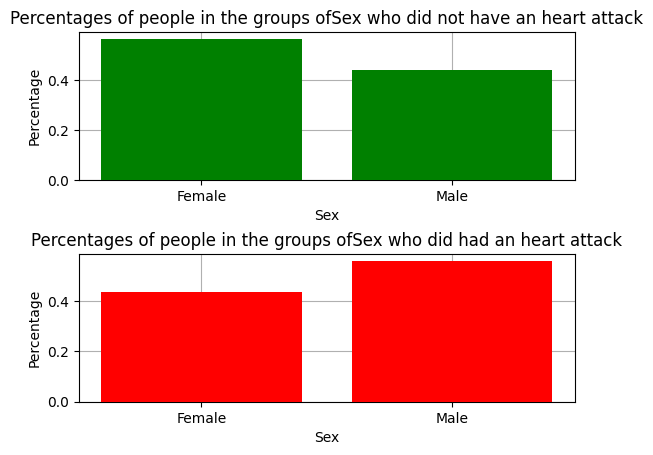

In [28]:
plot_pivot_tab(heart_attack_2020, 'Sex', 'HeartDisease')

From these data it appears that women are less susceptible to heart problems than man.

## Smokers

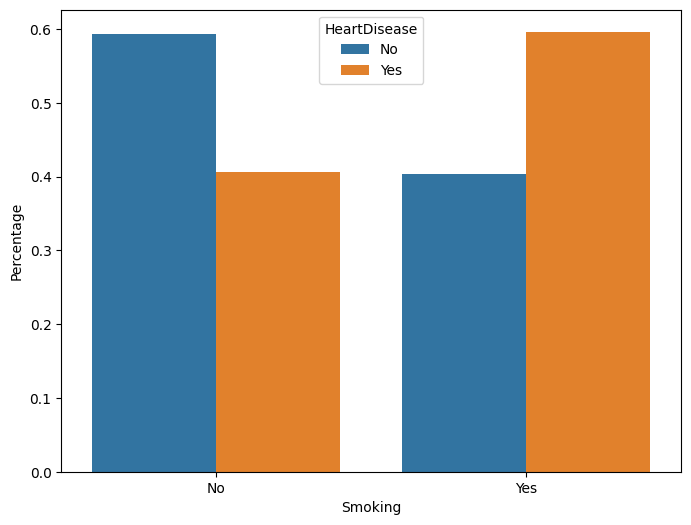

In [29]:
plot_categorical_barplot(heart_attack_2020, 'Smoking', 'HeartDisease')

The number of people of hadn't had an heart attack in our dataset is bigger than the number of people who hadn't, hence the difference in value between "No heart attack and heart attack". Anyway we can see that the percentage of people that never smoked and had an heart attack is evidently inferior ro the others.

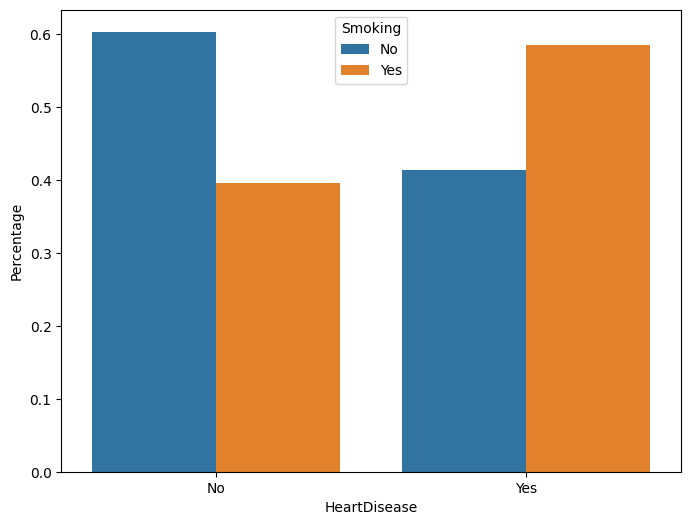

In [30]:
plot_categorical_barplot(heart_attack_2020,'HeartDisease', 'Smoking')

Smoking          No    Yes
HeartDisease              
No            16527  10846
Yes           11336  16037


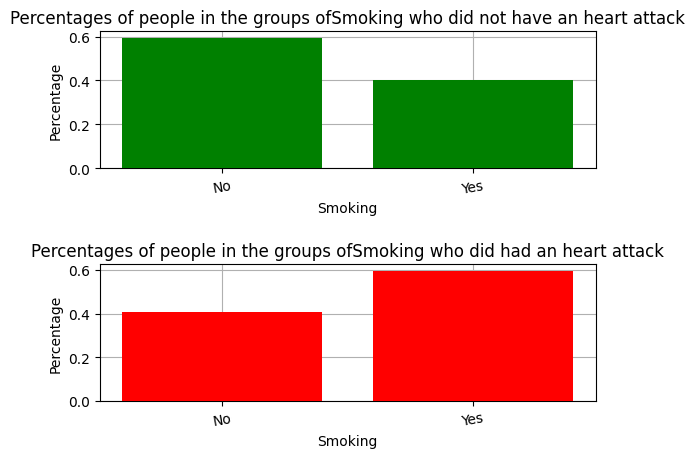

In [31]:
plot_pivot_tab(heart_attack_2020, 'Smoking', 'HeartDisease', rotation=10, distance=0.7)

It is evident that smoking increases the risk of heart attack.

## Alcohol

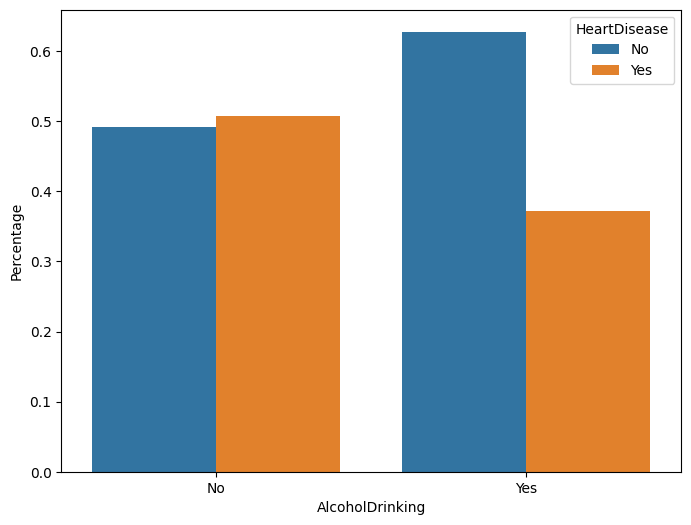

In [32]:
plot_categorical_barplot(heart_attack_2020, 'AlcoholDrinking', 'HeartDisease')

AlcoholDrinking     No   Yes
HeartDisease                
No               25448  1925
Yes              26232  1141


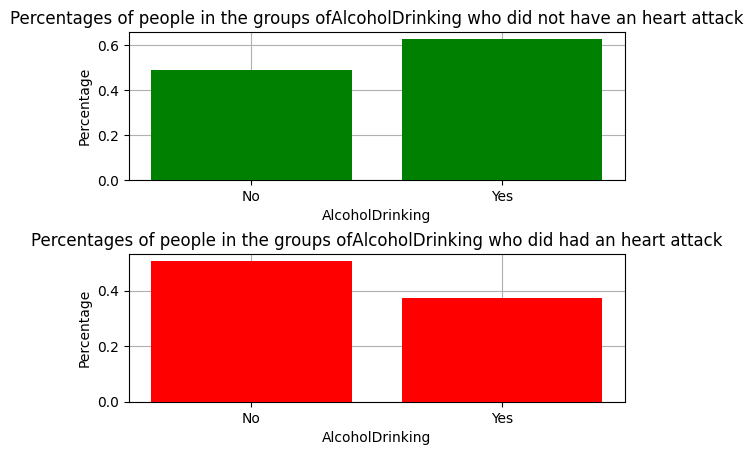

In [33]:
plot_pivot_tab(heart_attack_2020, 'AlcoholDrinking', 'HeartDisease', rotation=0)

### Alcohol and age

C:\Users\Hp\AppData\Local\Temp\ipykernel_21612\3710347480.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_counts = heart_attack_2020.groupby(['AgeGroup','AlcoholDrinking']).size().unstack(fill_value=0)


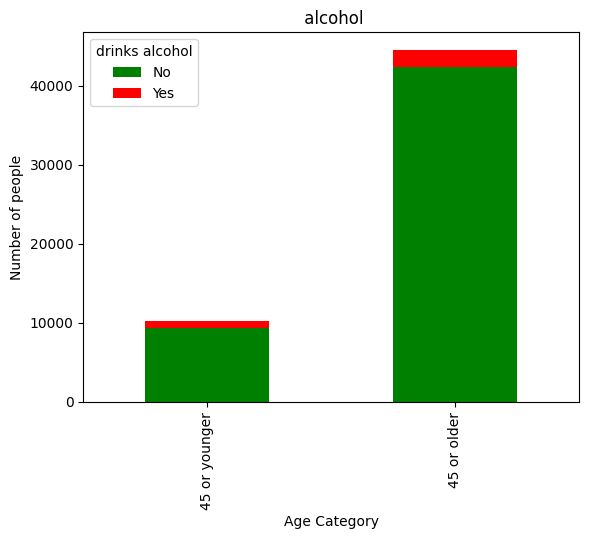

In [34]:
def convert_age_category(age_category):
    if 'or older' in age_category:
        return float('inf')
    elif 'or younger' in age_category:
        return -float('inf')
    else:
        return float(age_category.split('-')[0])

# Apply the conversion function to 'AgeCategory'
heart_attack_2020['AgeGroup'] = pd.cut(heart_attack_2020['AgeCategory'].apply(convert_age_category),
                        bins=[-float('inf'), 44, float('inf')],
                        labels=['45 or younger', '45 or older'])
df_counts = heart_attack_2020.groupby(['AgeGroup','AlcoholDrinking']).size().unstack(fill_value=0)

# Plotting the histogram
ax = df_counts.plot(kind='bar', stacked=True, color=['green', 'red'])
# Adding labels and titles
plt.xlabel('Age Category')
plt.ylabel('Number of people')
plt.title(' alcohol')
plt.legend(title='drinks alcohol', labels=['No', 'Yes'])
plt.show()

From the statistics in this dataset it appears that drinking alchool prevents heart attacks. It obviously is noyt true and it is probably due to the following reason:

* The dataset doesn't distinguish among no drinkers, people who drink sporadically, people who drink often and alcholics. This might have made the statistic imprecise.

For this reason this field will be removed from the dataset

## Stroke

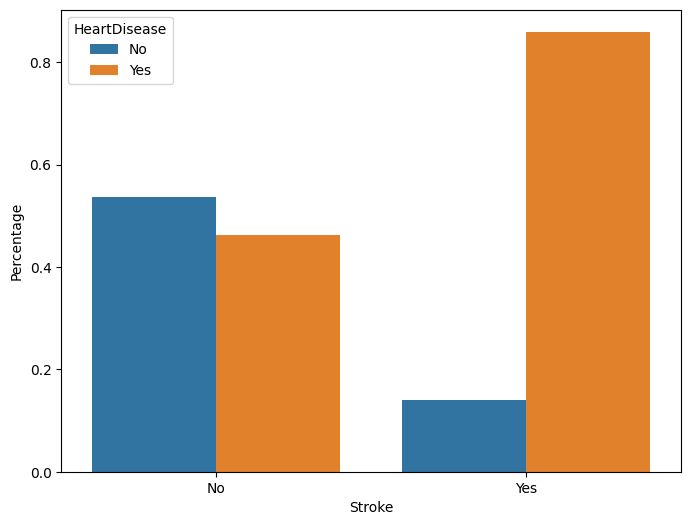

In [35]:
plot_categorical_barplot(heart_attack_2020, 'Stroke', 'HeartDisease')

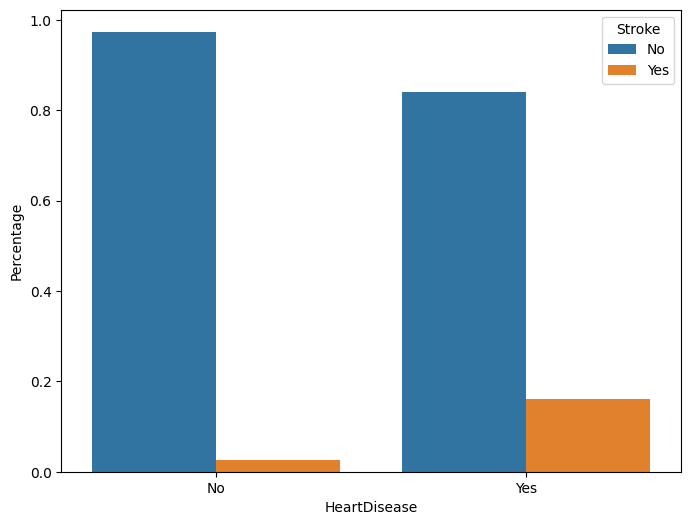

In [36]:
plot_categorical_barplot(heart_attack_2020,'HeartDisease', 'Stroke')

Stroke           No   Yes
HeartDisease             
No            26658   715
Yes           22984  4389


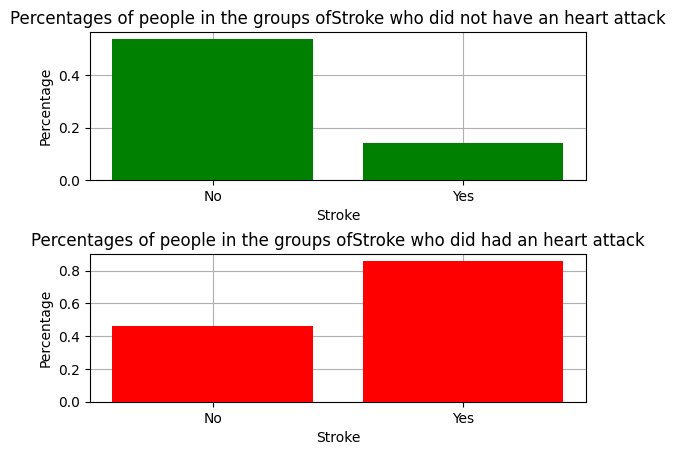

In [37]:
plot_pivot_tab(heart_attack_2020, 'Stroke', 'HeartDisease', rotation=0)

As expected strokes are an indicator of heart diseases

## Physical Health

c:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


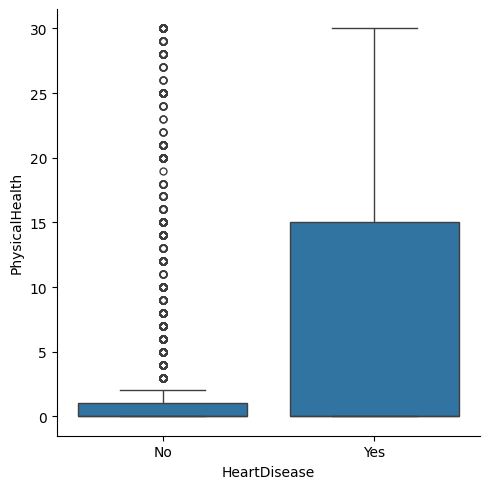

In [38]:
sns.catplot(x='HeartDisease', y="PhysicalHealth",
            data=heart_attack_2020,
            kind="box",
)

It's clear that having phisical health < 3 is an indicator of a healthy heart 

Mental Health

c:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


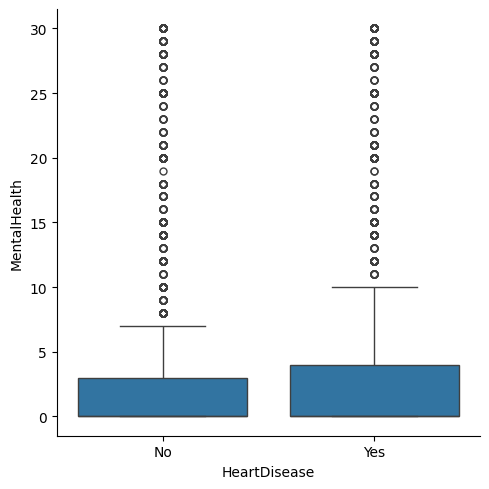

In [39]:
sns.catplot(x='HeartDisease', y="MentalHealth",
            data=heart_attack_2020,
            kind="box",
)

Difficoulty Walking

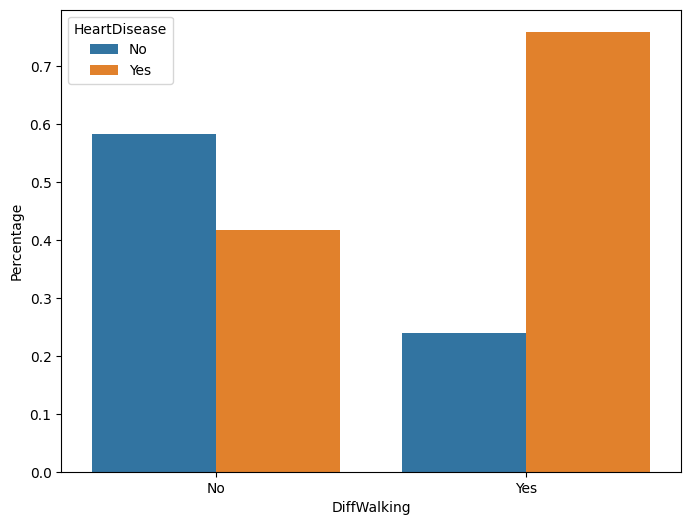

In [40]:
plot_categorical_barplot(heart_attack_2020, 'DiffWalking', 'HeartDisease')

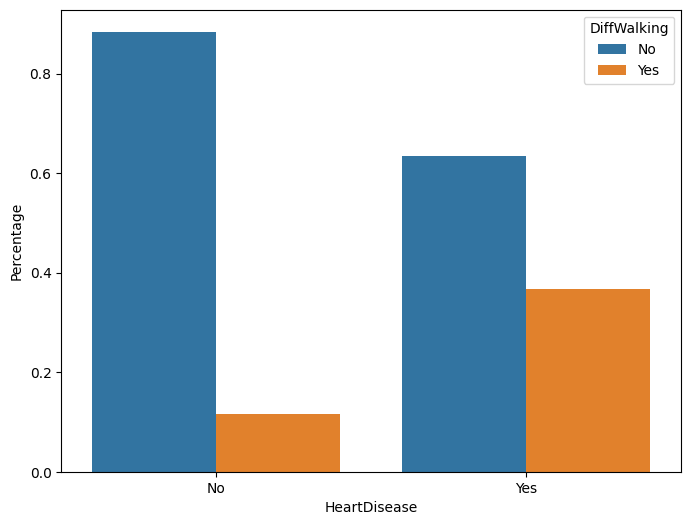

In [41]:
plot_categorical_barplot(heart_attack_2020,'HeartDisease', 'DiffWalking')

DiffWalking      No    Yes
HeartDisease              
No            24206   3167
Yes           17345  10028


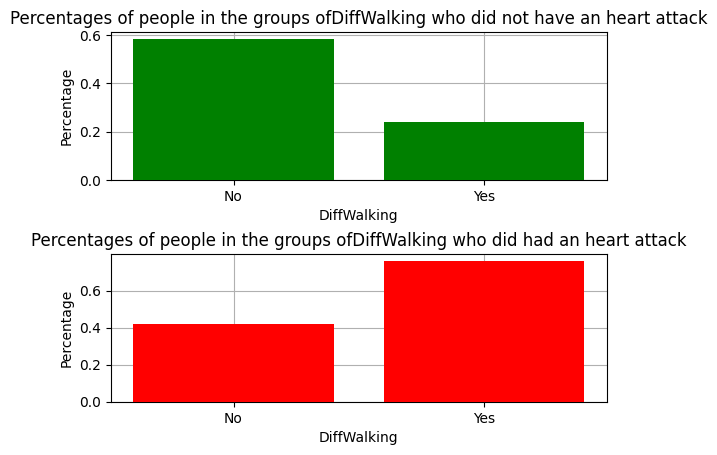

In [42]:
plot_pivot_tab(heart_attack_2020, 'DiffWalking', 'HeartDisease', rotation=0)

## Race	

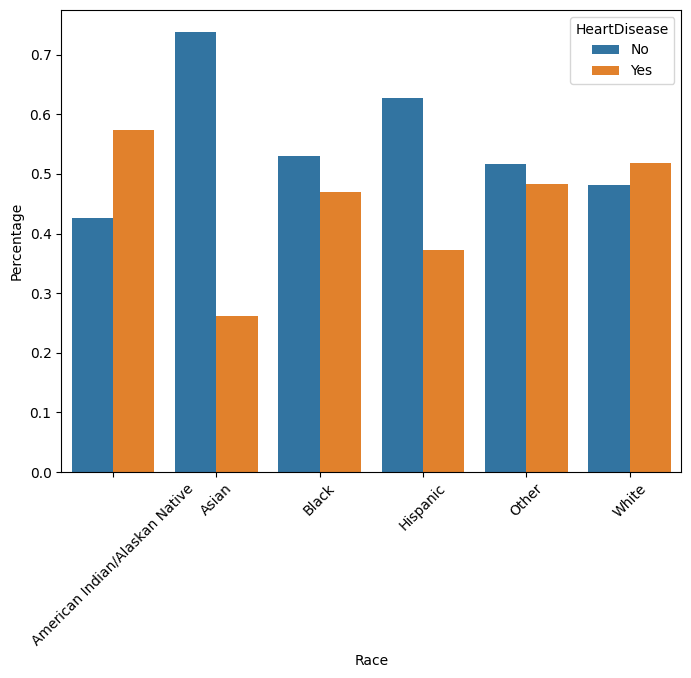

In [43]:
plot_categorical_barplot(heart_attack_2020, 'Race', 'HeartDisease', rotation=45)

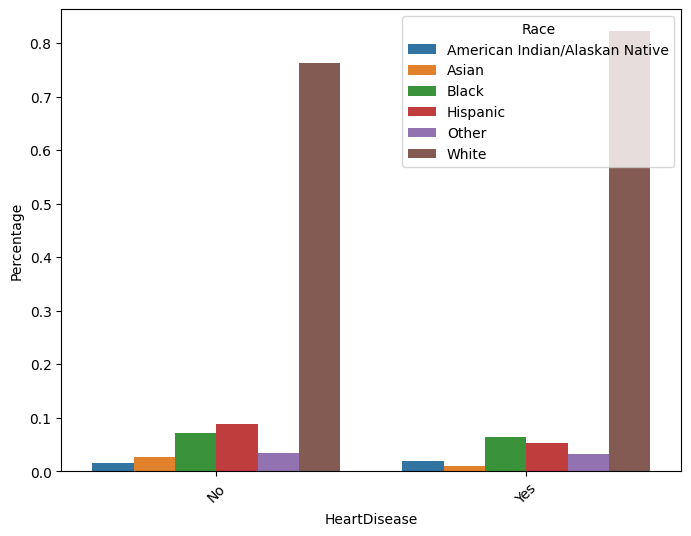

In [44]:
plot_categorical_barplot(heart_attack_2020, 'HeartDisease','Race', rotation=45)

## Diabetis

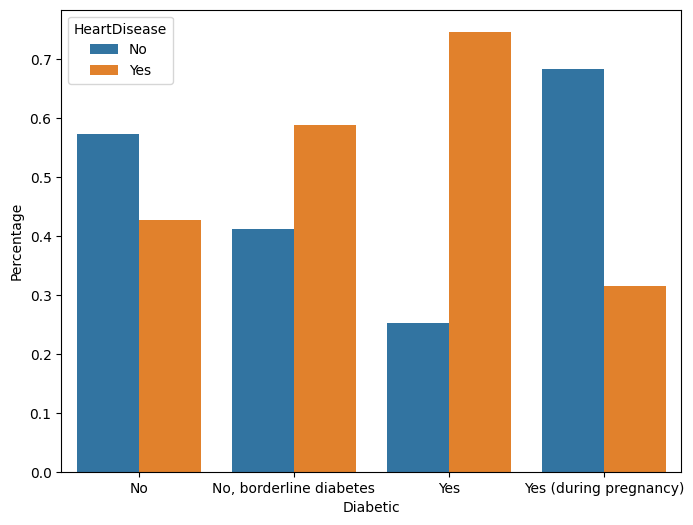

In [45]:
plot_categorical_barplot(heart_attack_2020, 'Diabetic', 'HeartDisease')

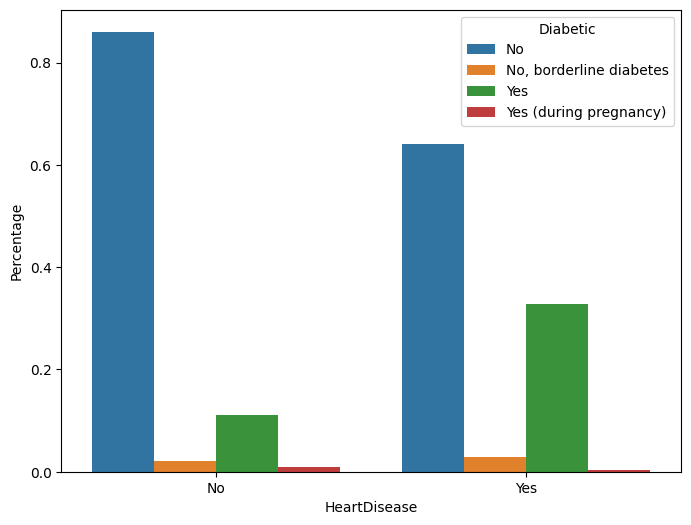

In [46]:
plot_categorical_barplot(heart_attack_2020, 'HeartDisease', 'Diabetic')

Diabetic         No  No, borderline diabetes   Yes  Yes (during pregnancy)
HeartDisease                                                              
No            23550                      553  3036                     234
Yes           17519                      789  8957                     108


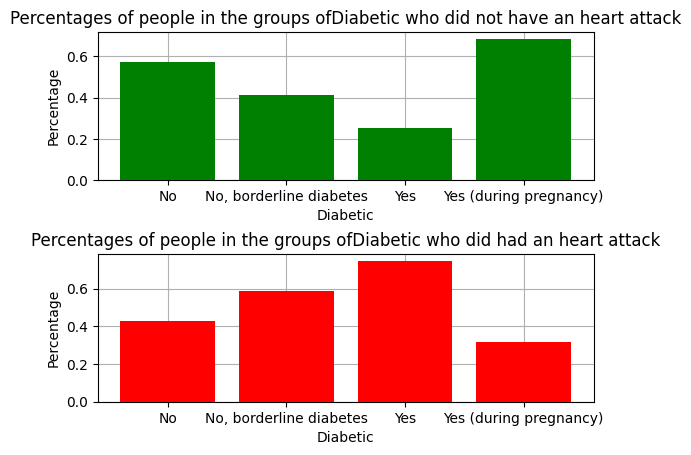

In [47]:
plot_pivot_tab(heart_attack_2020, 'Diabetic', 'HeartDisease', rotation=0)

## Physical Activity

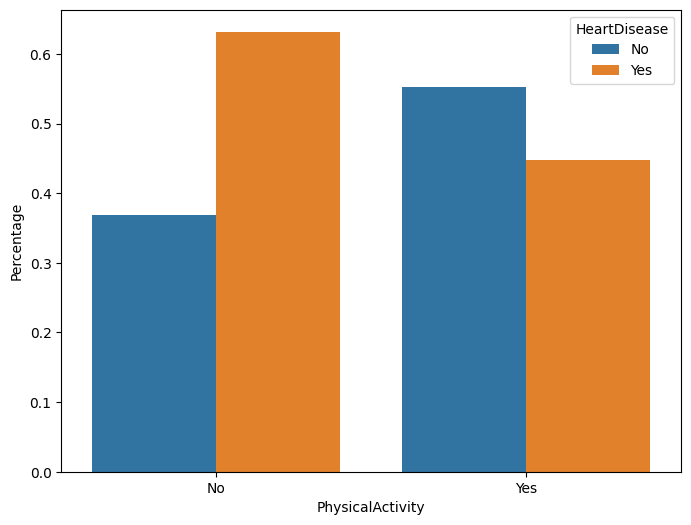

In [48]:
plot_categorical_barplot(heart_attack_2020, 'PhysicalActivity', 'HeartDisease')

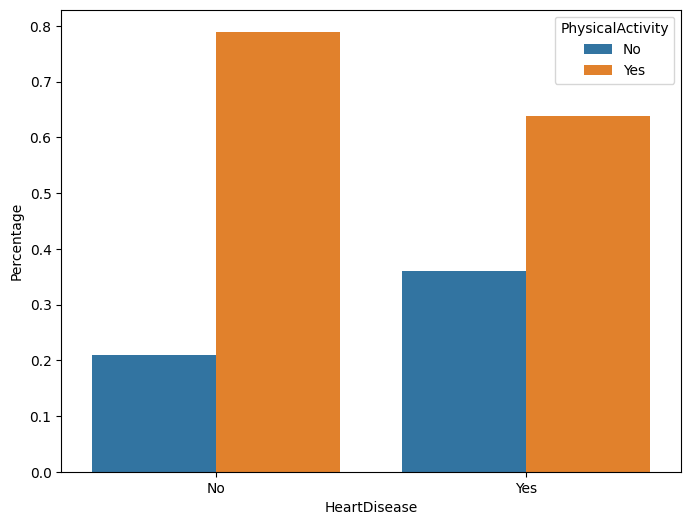

In [49]:
plot_categorical_barplot(heart_attack_2020, 'HeartDisease', 'PhysicalActivity')

PhysicalActivity    No    Yes
HeartDisease                 
No                5757  21616
Yes               9884  17489


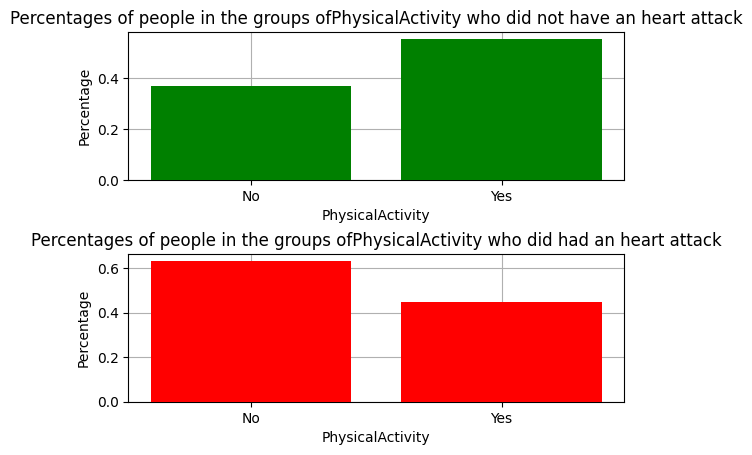

In [50]:
plot_pivot_tab(heart_attack_2020, 'PhysicalActivity', 'HeartDisease', rotation=0)

## General Health

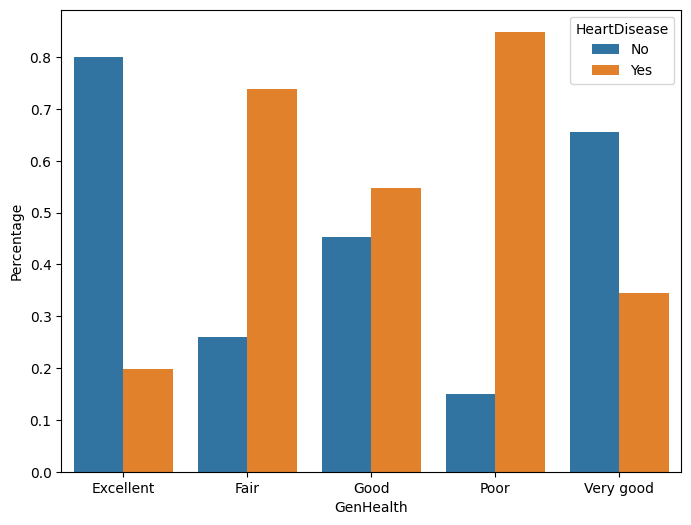

In [51]:
plot_categorical_barplot(heart_attack_2020, 'GenHealth', 'HeartDisease')

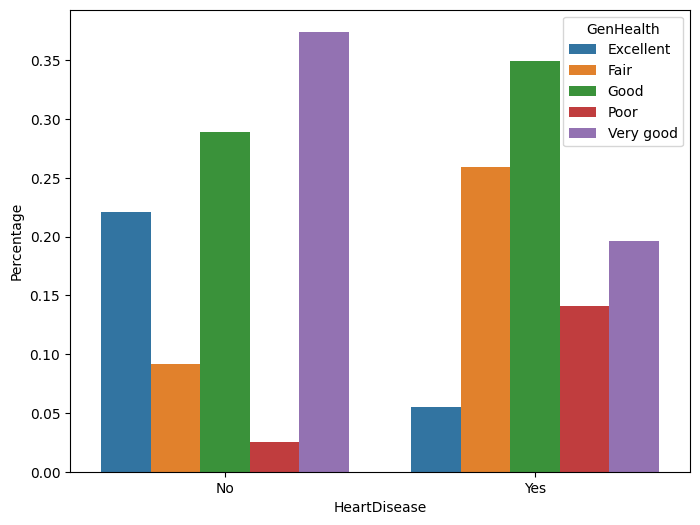

In [52]:
plot_categorical_barplot(heart_attack_2020, 'HeartDisease', 'GenHealth')

GenHealth     Excellent  Fair  Good  Poor  Very good
HeartDisease                                        
No                 6040  2499  7906   683      10245
Yes                1500  7084  9558  3850       5381


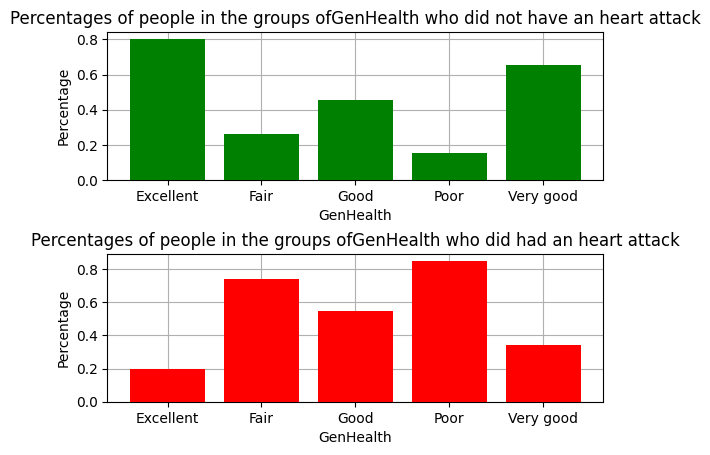

In [53]:
plot_pivot_tab(heart_attack_2020, 'GenHealth', 'HeartDisease', rotation=0)